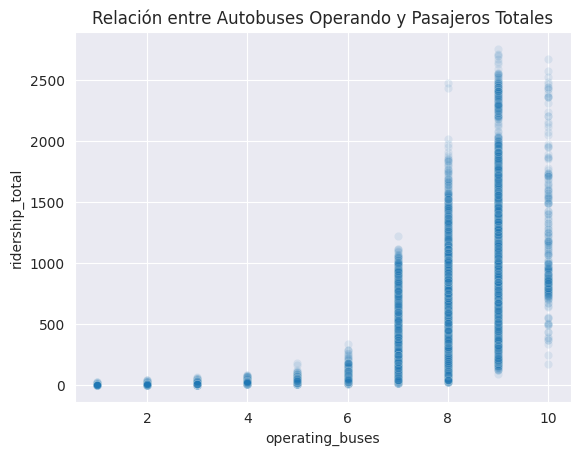

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

model_input_path = "../../data/model_input.parquet"

df_model_input = pd.read_parquet(model_input_path)

sns.scatterplot(data=df_model_input, x='operating_buses', y='ridership_total', alpha=0.1)
plt.title('Relación entre Autobuses Operando y Pasajeros Totales')
plt.show()

In [2]:
# Calcula la correlación entre 'operating_buses' y 'ridership_total'
correlation = df_model_input['operating_buses'].corr(df_model_input['ridership_total'])

print(f"La correlación entre autobuses operando y pasajeros totales es: {correlation:.2f}")

La correlación entre autobuses operando y pasajeros totales es: 0.65


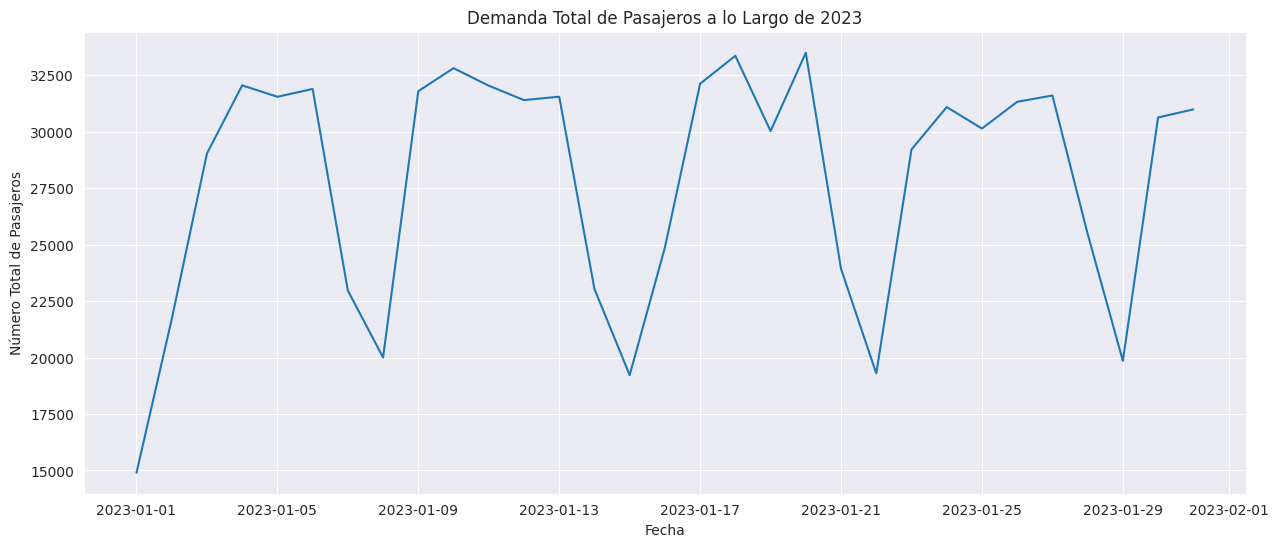

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt


# Para que el gráfico sea legible, vamos a agrupar los datos por día
df_daily = df_model_input.groupby(df_model_input['hour_timestamp'].dt.date)['ridership_total'].sum()
df_daily.index = pd.to_datetime(df_daily.index)
df_daily = df_daily['2023-01-01' : '2023-01-31']
# Creamos la figura y los ejes para el gráfico
plt.figure(figsize=(15, 6)) # Hacemos el gráfico más grande para que se vea bien

# Usamos seaborn para crear el gráfico de líneas
sns.lineplot(data=df_daily)

# Añadimos títulos para que se entienda
plt.title('Demanda Total de Pasajeros a lo Largo de 2023')
plt.xlabel('Fecha')
plt.ylabel('Número Total de Pasajeros')
plt.grid(True) # Añadimos una cuadrícula para facilitar la lectura
plt.show() # Mostramos el gráfico

In [25]:
df_day_of_week = df_model_input.groupby('day_of_week')['ridership_total'].mean()
print(df_day_of_week)
df_day_of_week = df_model_input.groupby('day_of_week')['ridership_total'].sum()
print(df_day_of_week)

day_of_week
0    563.965791
1    596.593546
2    605.218836
3    587.318275
4    586.316764
5    522.990056
6    441.262931
Name: ridership_total, dtype: float64
day_of_week
0    1632117
1    1737877
2    1767239
3    1716144
4    1710286
5    1314797
6    1126103
Name: ridership_total, dtype: uint32


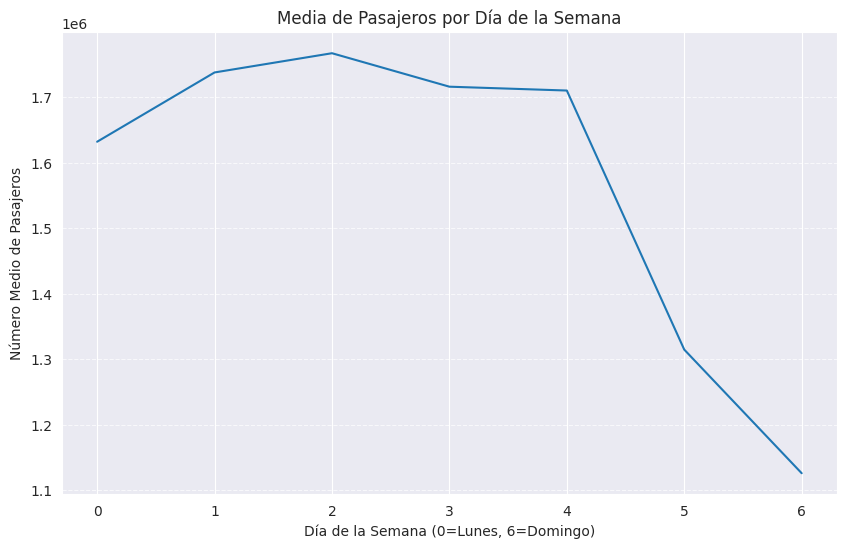

In [29]:
# Crea la figura
plt.figure(figsize=(10, 6))

# Crea un gráfico de barras usando seaborn
sns.lineplot(x=df_day_of_week.index, y=df_day_of_week.values)

# Añade títulos y etiquetas
plt.title('Media de Pasajeros por Día de la Semana')
plt.xlabel('Día de la Semana (0=Lunes, 6=Domingo)')
plt.ylabel('Número Medio de Pasajeros')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()